# Data Exploration 2

## <br>By Jean-Philippe Pitteloud</br>

### Requirements

In [7]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
%matplotlib inline

warnings.filterwarnings('ignore')

### Data Gathering

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing 
engine.dispose()

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**1. Are there any differences between the genders, ethnicities and parental level of education with respect to their performances in exams?**

In [6]:
students_df.groupby('gender').mean()[['math score', 'reading score', 'writing score']]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [9]:
ttest_ind(students_df[students_df.gender == "female"][["math score", "reading score", "writing score"]], students_df[students_df.gender == "male"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

From the results above, 'female' students tends to outperform 'male' students in 'reading score' and 'writing score', while 'male' students tend to score higher in 'math score'. The differences between the groups are statistically significant as suggested by the calculated p-value for the test

In [10]:
students_df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [15]:
ethnicities = students_df["race/ethnicity"].unique()

for col in ["math score", "reading score", "writing score"]:
    print('\n')
    print("Variable: {}".format(col))
    print('\n')
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print("t-test - ethnicities {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(students_df[students_df["race/ethnicity"] == ethnicities[i]][col], students_df[students_df["race/ethnicity"] == ethnicities[j]][col]))



Variable: math score


t-test - ethnicities group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test - ethnicities group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test - ethnicities group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test - ethnicities group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test - ethnicities group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test - ethnicities group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test - ethnicities group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test - ethnicities group A and group D:
Ttest_indResult(statistic=-3.3466982429712298, pvalue=0.0009068636053543751)
t-test - ethnicities group A and group E:

Considering the results of the t-tests presented above, there are significant differences between the ethnic groups in terms of scores except between groups A, B and C

In [14]:
students_df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [16]:
edu_levels = students_df["parental level of education"].unique()

for col in ["math score", "reading score", "writing score"]:
    print('\n')
    print("Variable: {}".format(col))
    print('\n')
    for i in range(0, len(edu_levels)):
        for j in range(i+1, len(edu_levels)):
            print("t-test - education levels {0} and {1}:".format(edu_levels[i], edu_levels[j]))
            print(ttest_ind(students_df[students_df["parental level of education"] == edu_levels[i]][col], students_df[students_df["parental level of education"] == edu_levels[j]][col]))



Variable: math score


t-test - education levels bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test - education levels bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test - education levels bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test - education levels bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test - education levels bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test - education levels some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test - education levels some college and associate's degree:
Ttest_indResult(statistic=-0.5426842696247527, pvalue=0.5876182809234072)
t-test 

From the results presented above, it seems that the parental education levels more associated to higher performance in the three disciplines selected are the Bachelors and higher. The difference between groups higher than bachelors against lower tend to be significant for every discipline. In contrast, the differences between groups that are higher than Bachelors tend to be less dramatic

**2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?**

In [17]:
students_df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [18]:
ttest_ind(students_df[students_df.lunch == "free/reduced"][["math score", "reading score", "writing score"]], students_df[students_df.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

From the results of the t-test presented above, it is clear that there is a statitically significant difference between the students that have a 'standard' lunch and the students that have a 'free/reduced' lunch. Although not directly proportional, access to reduced fee lunches might be associated with economic hardship, which might have a multifactorial impact in the students performance

**3. Does the test preparation course seem to have an effect on the exam performances?**

In [19]:
students_df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [20]:
ttest_ind(students_df[students_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]], students_df[students_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

As it can be seen from the results above, the "completion" of the preparation courses tend to have a positive impact of the students in all three disciplines selected. The impact seems to be more dramatic in 'reading score' and 'writing score'

**4. Which two exam scores are correlated the most with each other?**

In [25]:
corr_mat = students_df[["math score", "reading score", "writing score"]].corr()
corr_mat

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


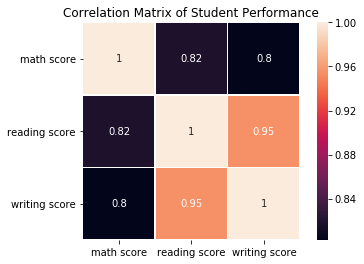

In [30]:
sns.heatmap(corr_mat, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix of Student Performance")
plt.yticks(rotation = 0);

From the both the table and heat map presented above, the two most correlated scores are 'writing score' and 'reading score'